In [1]:
import os 
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from datetime import datetime

In [2]:
def connect_database(path):
    """
    Set connection conditions, with ETH VPN and Putty connected.
    
    Paramaters
    ----------
    path : str 
    
    Returns
    ----------
    engine: 
    """
    
    os.chdir(path)
    print("Current working directory:", os.getcwd())
    
    # import account info
    from db_login import DSN # never store your access data in your script!
    
    # connect to database
    engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**DSN))    
    
    return engine

def data_overview(engine, query, attr):
    """
    Have an overview of selected dataset.
    
    Paramaters
    ----------
    engine : 
    query : str
    attr : list
    
    Returns
    ----------
    df : dataframe
        
    """
    df = pd.read_sql(pandas_query, engine)
    print("Data items obtained.\n")

    print("First three rows of data:\n",df.head(n=3),"\n")
    print("Name and data types of columns:\n",df.dtypes,"\n")
    
    # check non-null and null values
    print("Number of non-null values:\n", df.count(), "\n") 
    print("Number of null values:\n", df.isnull().sum(), "\n")

    # check unique values
    print("Number of unique values:\n", df[attr].nunique(),"\n") 
    
    return df

def plot_item_day(df, attr):
    """
    Plot data items by day.
    
    Paramaters
    ----------
    df : dataframe
    attr : str
    
    Returns
    ----------
    date_df : dataframe
        
    """
    newattr = attr + "_ymd"
    df[newattr] = pd.to_datetime(df[attr]).dt.date
    date_df = pd.DataFrame(df[newattr].value_counts())
    date_df['count_perday'] = date_df[newattr]
    date_df[newattr] = date_df.index
    date_df.columns = ['date','count_perday']
    date_df = date_df.sort_values(by='date', ascending=True)
    date_df.index = range(0,len(date_df))
    
    print("First data item on:", date_df.loc[0,'date'],"\n")
    print("Last data item on:", date_df.loc[date_df.index[-1],'date'],"\n")
    
    plt.figure(figsize=(20, 6), dpi=80)
    plt.plot(date_df['date'], date_df['count_perday'])
    
    date_maxdata = date_df['count_perday'].max()
    print("Max data item on:\n", date_df[date_df['count_perday']==date_maxdata],"\n")
    date_mindata = date_df['count_perday'].min()
    print("Min data item on:\n",date_df[date_df['count_perday']==date_mindata], "\n")
    
    print("Data distribution of count_perday:\n",date_df['count_perday'].describe(),"\n")

    return date_df

def group_attr(df, attr):
    """
    Group attributes in a dataframe.
    
    Paramaters
    ----------
    df : dataframe
    attr : str
    
    Returns
    ----------
    date_df : dataframe
        
    """
    
    colname = "count_"+attr.replace("_", "")
    
    print("Group by "+attr+":\n", df[attr].value_counts(), "\n")
    
    df_atr_list = pd.DataFrame(df[attr].value_counts())
    df_atr_list[colname] = df_atr_list[attr]
    df_atr_list[attr] = df_atr_list.index
    df_atr_list.index = range(0,len(df_atr_list))
    
    print("Data distribution of "+attr+":\n",df_atr_list.describe(),"\n")

    return df_atr_list

In [3]:
# set working directory
path = "F:/0_Thesis_2021/2_EDA"
os.chdir(path)
print("Current working directory:",os.getcwd())

# import account info
from db_login import DSN # never store your access data in your script!

# connect to database
engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**DSN))

Current working directory: F:\0_Thesis_2021\2_EDA


### Data overview

In [4]:
# select all data items
print("bmw table:\n---------------------")
pandas_query = """SELECT * FROM version_20181213.bmw""" 
attr = ['vin','zustand','id','user_id']
bmw_df = data_overview(engine, pandas_query, attr)

bmw table:
---------------------
Data items obtained.

First three rows of data:
                                 vin zustand timestamp_start_local  \
0  002425ad4398c950b02d6eb9f197d1e7   fahrt   2017-01-16 18:24:00   
1  002425ad4398c950b02d6eb9f197d1e7   fahrt   2017-01-31 08:48:00   
2  002425ad4398c950b02d6eb9f197d1e7   fahrt   2017-02-11 10:01:00   

  timestamp_end_local timestamp_start_utc   timestamp_end_utc  km_stand_start  \
0 2017-01-16 19:05:00 2017-01-16 17:24:00 2017-01-16 18:05:00              21   
1 2017-01-31 09:02:00 2017-01-31 07:48:00 2017-01-31 08:02:00             447   
2 2017-02-11 10:24:00 2017-02-11 09:01:00 2017-02-11 09:24:00            1009   

   km_stand_end  soc_customer_start  soc_customer_end  ...  longitude_end  \
0            74                81.5              53.0  ...       8.029728   
1           461                71.5              61.0  ...       7.150026   
2          1036                77.5              59.0  ...       7.452944   

   batt

In [5]:
# select all data items
print("staypoints table:\n---------------------")
pandas_query = """SELECT * FROM version_20181213.staypoints""" 
attr = ['id','user_id','trip_id','prev_trip_id','next_trip_id','purpose_detected','purpose_validated','validated_at']
pnt_df = data_overview(engine, pandas_query, attr)

staypoints table:
---------------------
Data items obtained.

First three rows of data:
         id  user_id  trip_id  prev_trip_id  next_trip_id  \
0  3176483     1810      NaN      233501.0      233502.0   
1  3177124     1810      NaN      233502.0      233503.0   
2  3178457     1810      NaN      233503.0      233504.0   

                  started_at             finished_at purpose_detected  \
0 2017-03-23 10:40:42.155999 2017-03-23 11:33:14.579             work   
1 2017-03-23 11:37:18.999000 2017-03-23 15:57:43.898             work   
2 2017-03-23 17:01:55.000000 2017-03-24 05:06:55.197             home   

  purpose_validated  validated               validated_at  activity  \
0              work       True 2017-03-24 05:33:20.387181      True   
1              work       True 2017-03-24 05:33:20.403929      True   
2              home       True 2017-03-24 05:33:20.479103      True   

                                        geometry_raw geometry  
0  0101000020E6100000A3D48A0

In [11]:
print("triplegs table:\n---------------------")
# select random 100 data items
pandas_query = """SELECT * FROM version_20181213.triplegs limit 100""" 
tripleg100_df = pd.read_sql(pandas_query, engine)

print("First three rows of data:\n",tripleg100_df.head(n=3),"\n")
print("Name and data types of columns:\n",tripleg100_df.dtypes,"\n")

triplegs table:
---------------------
First three rows of data:
           id  user_id  trip_id                 started_at  \
0    3803411     1676   125561 2017-11-06 16:53:52.164000   
1  103780915     1696   149681 2017-10-30 16:14:04.424000   
2  202989190     1725   186976 2017-02-17 16:58:22.721027   

                 finished_at mode_detected mode_validated  validated  \
0 2017-11-06 17:27:47.039000    Mode::Walk     Mode::Walk       True   
1 2017-10-30 16:14:46.170589   Mode::Train     Mode::Walk       True   
2 2017-02-17 16:58:47.881000     Mode::Bus     Mode::Walk       True   

                validated_at  cust_movements_id  \
0 2017-11-22 19:27:22.336463                NaN   
1 2017-11-03 06:52:53.576359            34551.0   
2 2017-02-18 07:44:09.959500            44150.0   

                                        geometry_raw  \
0  0102000020E61000007000000007FA884CE39F204093D4...   
1  0102000020E610000002000000550CA1945A91184000FD...   
2  0102000020E61000000200000

### Collection period

bmw table:
---------------------
First data item on: 2016-09-16 

Last data item on: 2017-12-31 

Max data item on:
           date  count_perday
57  2017-01-27          1534 

Min data item on:
           date  count_perday
0   2016-09-16             1
1   2016-09-20             1
2   2016-09-28             1
4   2016-10-05             1
8   2016-11-21             1
10  2016-11-29             1
11  2016-12-08             1
19  2016-12-17             1
22  2016-12-21             1 

Data distribution of count_perday:
 count     396.000000
mean      874.939394
std       374.185138
min         1.000000
25%       749.250000
50%      1002.500000
75%      1119.500000
max      1534.000000
Name: count_perday, dtype: float64 



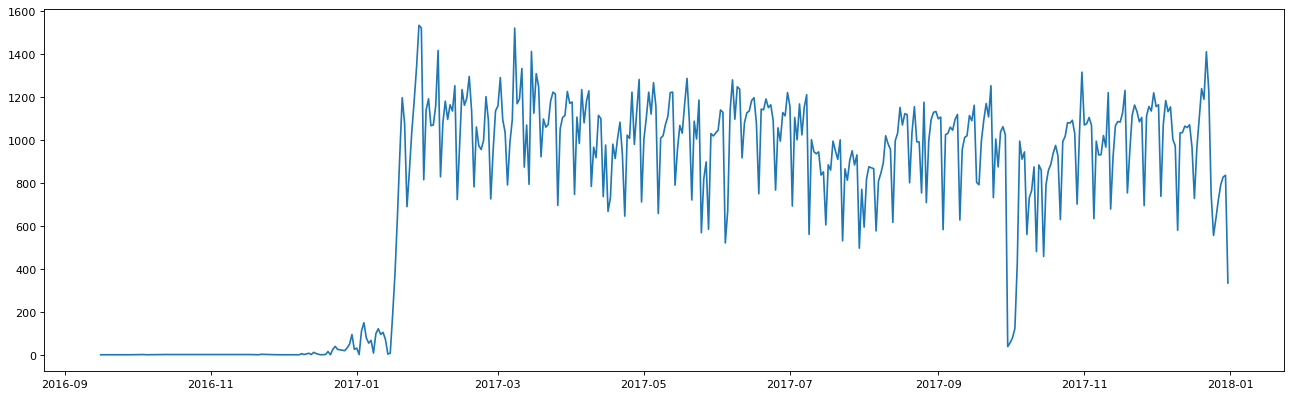

In [12]:
print("bmw table:\n---------------------")
attr = "timestamp_start_utc"
bmw_date_df = plot_item_day(bmw_df, attr)

A data gap around 2017-10.

staypoints table:
---------------------
First data item on: 2016-11-23 

Last data item on: 2018-01-31 

Max data item on:
            date  count_perday
129  2017-04-01          1084 

Min data item on:
          date  count_perday
0  2016-11-23            63 

Data distribution of count_perday:
 count     435.000000
mean      751.554023
std       151.789931
min        63.000000
25%       683.500000
50%       766.000000
75%       840.500000
max      1084.000000
Name: count_perday, dtype: float64 



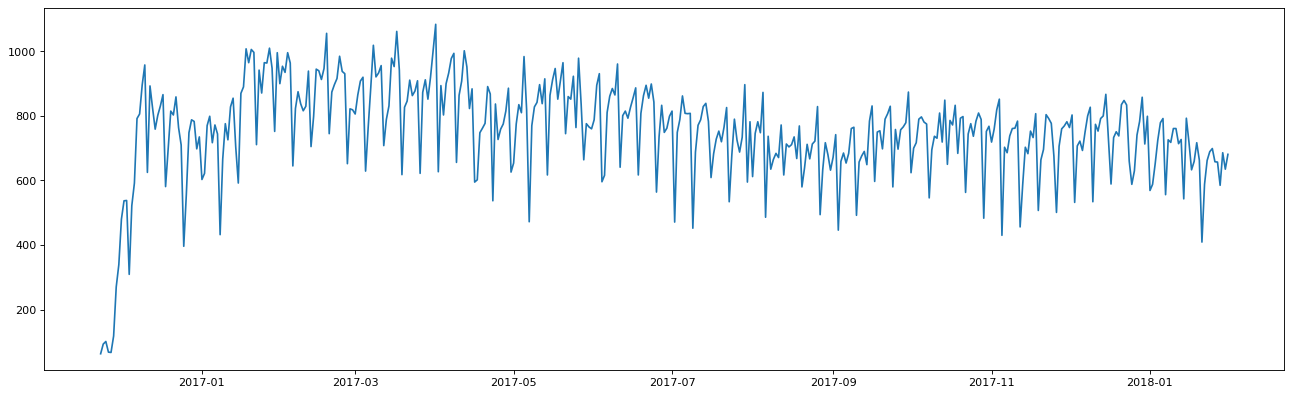

In [13]:
print("staypoints table:\n---------------------")
attr = 'started_at'
pnt_date_df = plot_item_day(pnt_df, attr)

In [14]:
print("triplegs table:\n---------------------")
attr = 'started_at'
tripleg_date_df = plot_item_day(tripleg_df, attr)

triplegs table:
---------------------


NameError: name 'tripleg_df' is not defined

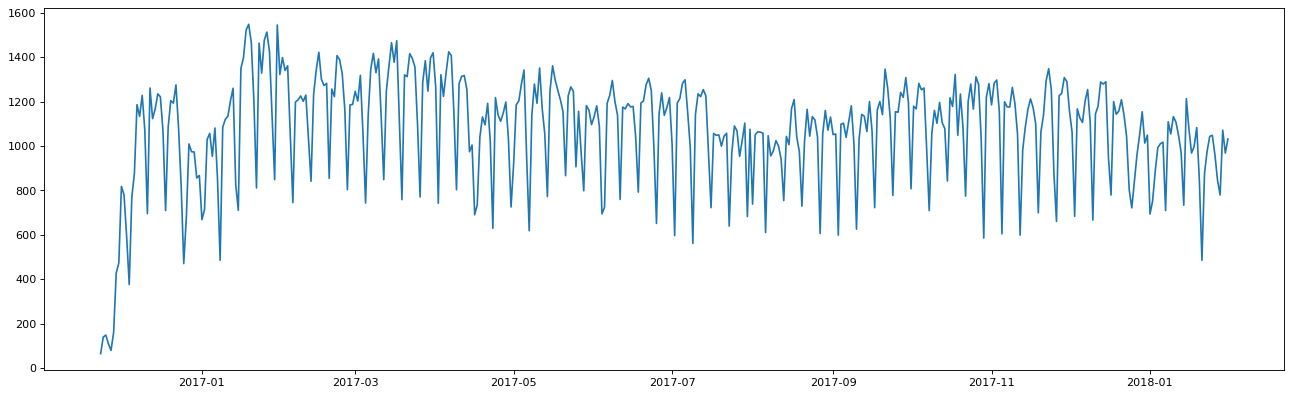

Intersected time will be kept. - More focus on bmw table with energy data provided.

### *User_id* attribute

In [ ]:
attr = "user_id"

In [16]:
print("bmw table:\n---------------------")
bmw_userid_list = group_attr(bmw_df,attr)

bmw table:
---------------------
Group by user_id:
 1682.0    5679
1694.0    4766
1691.0    4309
1802.0    4294
1637.0    4095
          ... 
1650.0    1063
1598.0    1040
1733.0    1033
1685.0     974
1676.0     577
Name: user_id, Length: 135, dtype: int64 

Data distribution of user_id:
            user_id  count_userid
count   135.000000    135.000000
mean   1685.488889   2481.644444
std      58.023396    829.256100
min    1595.000000    577.000000
25%    1637.500000   1875.500000
50%    1681.000000   2419.000000
75%    1727.000000   2970.000000
max    1848.000000   5679.000000 



In [17]:
print("staypoints table:\n---------------------")
pnt_userid_list = group_attr(pnt_df,attr)

staypoints table:
---------------------
Group by user_id:
 1607    4439
1602    4411
1638    3712
1633    3598
1682    3455
        ... 
1737     722
1734     721
1629     665
1815     600
1672     223
Name: user_id, Length: 139, dtype: int64 

Data distribution of user_id:
            user_id  count_userid
count   139.000000    139.000000
mean   1686.920863   2351.985612
std      61.551565    735.354602
min    1595.000000    223.000000
25%    1637.500000   1956.500000
50%    1681.000000   2371.000000
75%    1729.500000   2883.500000
max    1934.000000   4439.000000 



In [ ]:
print("triplegs table:\n---------------------")
tripleg_userid_list = group_attr(tripleg_df,attr)

<div>
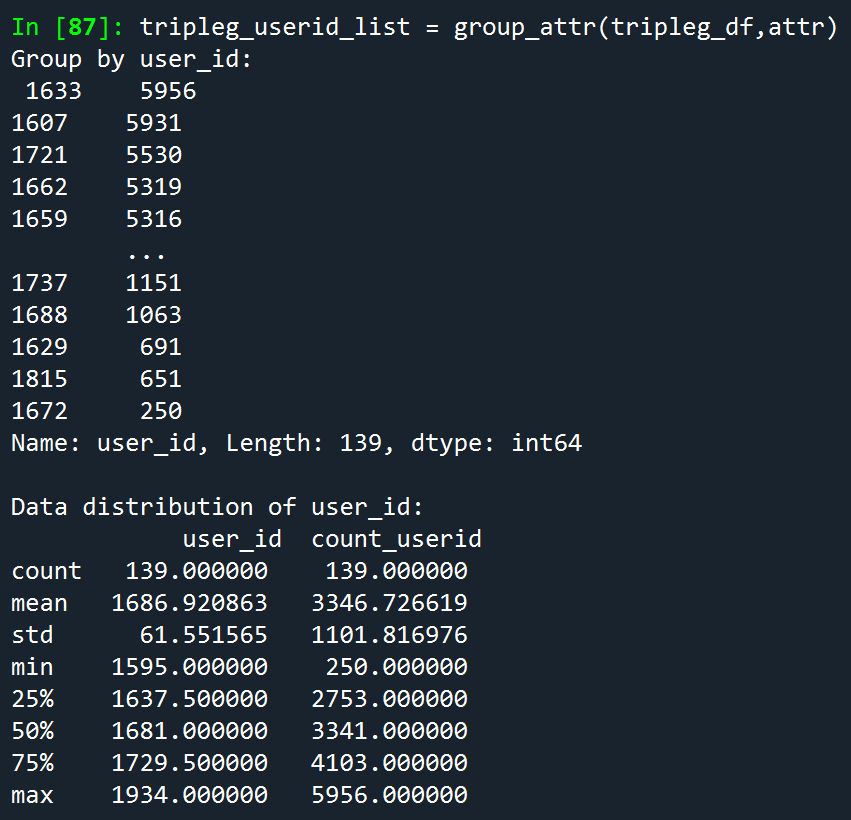
</div>

In [19]:
# difference between bmw and tripleg
print("Difference between staypoints user_id and bmw user_id:\n",set(list(pnt_userid_list['user_id']))-set(list(bmw_userid_list['user_id'])))
print("Difference between bmw user_id and staypoints user_id:\n",set(list(bmw_userid_list['user_id']))-set(list(pnt_userid_list['user_id'])))

print("Difference between tripleg user_id and bmw user_id:\n",set(list(tripleg_userid_list['user_id']))-set(list(bmw_userid_list['user_id'])))
print("Difference between bmw user_id and tripleg user_id:\n",set(list(bmw_userid_list['user_id']))-set(list(tripleg_userid_list['user_id'])))

Difference between staypoints user_id and bmw user_id:
 {1672, 1736, 1934, 1599}
Difference between bmw user_id and staypoints user_id:
 set()


NameError: name 'tripleg_userid_list' is not defined

<div>
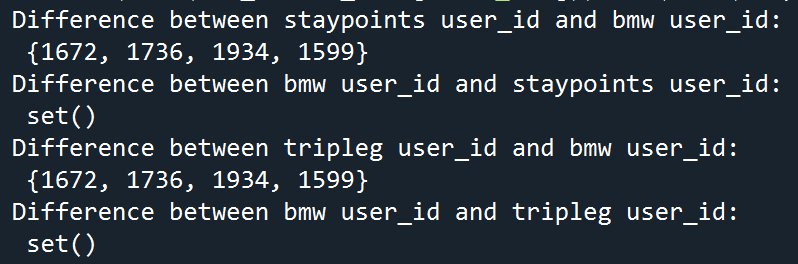
</div>

### *bmw* table

#### *user_id*: plot histogram by day

Group by user_id:
 1682.0    5679
1694.0    4766
1691.0    4309
1802.0    4294
1637.0    4095
          ... 
1650.0    1063
1598.0    1040
1733.0    1033
1685.0     974
1676.0     577
Name: user_id, Length: 135, dtype: int64 

           user_id  count_userid
count   135.000000    135.000000
mean   1685.488889   2481.644444
std      58.023396    829.256100
min    1595.000000    577.000000
25%    1637.500000   1875.500000
50%    1681.000000   2419.000000
75%    1727.000000   2970.000000
max    1848.000000   5679.000000


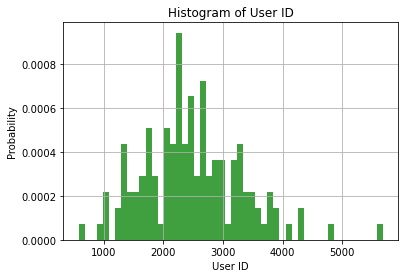

In [20]:
# plot histogram for user_id attribute
print("Group by user_id:\n", bmw_df['user_id'].value_counts(), "\n")
bmw_userid_list = pd.DataFrame(bmw_df['user_id'].value_counts())
bmw_userid_list['count_userid'] = bmw_userid_list['user_id']
bmw_userid_list['user_id'] = bmw_userid_list.index
bmw_userid_list.index = range(0,len(bmw_userid_list))
print(bmw_userid_list.describe())

n, bins, patches = plt.hist(bmw_userid_list['count_userid'], 50, density=False, facecolor='g', alpha=0.75)
plt.xlabel('User ID')
plt.ylabel('Probability')
plt.title('Histogram of User ID')
plt.grid(True)
plt.show()

#### *zustand*: plot pie chart by type

Group by zustand:
 ruhe      161266
fahrt     136272
laden      39886
luecke      9051
fah,t          1
Name: zustand, dtype: int64 



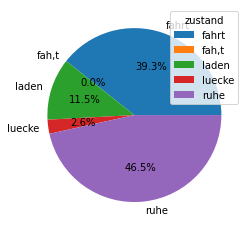

In [21]:
# plot pie chart for zustand attribute
print("Group by zustand:\n", bmw_df['zustand'].value_counts(), "\n")
pandas_query = """SELECT zustand, COUNT (*) AS "count_zustand" FROM version_20181213.bmw GROUP BY zustand""" # return counts by each unique value
bmw_zustand = pd.read_sql(pandas_query, engine)
plt.pie(bmw_zustand['count_zustand'], labels=bmw_zustand['zustand'], autopct='%1.1f%%')
plt.legend(title="zustand")

#### *timestamp_start_local, timestamp_end_local, timestamp_start_utc, timestamp_end_utc*

In [24]:
print(bmw_df['timestamp_start_utc'].max())
print(bmw_df['timestamp_start_utc'].min())
print(bmw_df['timestamp_start_local'].max())
print(bmw_df['timestamp_start_local'].min())

2017-12-31 22:29:00
2016-09-16 08:45:00
2017-12-31 23:29:00
2016-09-16 08:45:00


In [26]:
bmw_mintime = bmw_df.loc[bmw_df['timestamp_start_local'] == bmw_df['timestamp_start_local'].min()]
print(bmw_mintime)

                                     vin zustand timestamp_start_local  \
238931  f7279e2278c4e9822cd69f5c3e37bdc9    ruhe   2016-09-16 08:45:00   

       timestamp_end_local timestamp_start_utc   timestamp_end_utc  \
238931 2016-10-13 18:30:00 2016-09-16 08:45:00 2016-10-13 18:30:00   

        km_stand_start  km_stand_end  soc_customer_start  soc_customer_end  \
238931               2             2                27.5              26.5   

        ...  battery_temp_start  battery_temp_end  a_temp_start  a_temp_end  \
238931  ...                 NaN               NaN          16.0         5.5   

        geom_start  geom_end     id  user_id  tripleg_id  \
238931        None      None  27699   1681.0        None   

       timestamp_start_utc_ymd  
238931              2016-09-16  

[1 rows x 25 columns]


In [27]:
# calculate difference between utc and local timestamp / timezone located compared to utc one
bmw_df.loc[:,'timestamp_start_timezone'] = bmw_df.loc[:,'timestamp_start_local'] - bmw_df.loc[:,'timestamp_start_utc']
bmw_df.loc[:,'timestamp_end_timezone'] = bmw_df.loc[:,'timestamp_end_local'] - bmw_df.loc[:,'timestamp_end_utc']
    
print("Group by timestamp_start_timezone:\n", bmw_df['timestamp_start_timezone'].value_counts(), "\n")
print("Group by timestamp_end_timezone:\n", bmw_df['timestamp_end_timezone'].value_counts(), "\n")

Group by timestamp_start_timezone:
 0 days 02:00:00      205048
0 days 01:00:00      137531
0 days 00:00:00        3799
0 days 08:00:00          27
-1 days +01:00:00        18
0 days 03:00:00          15
0 days 11:00:00           9
0 days 04:00:00           6
-1 days +02:00:00         6
0 days 10:00:00           5
-1 days +13:00:00         5
-1 days +06:00:00         3
-1 days +18:00:00         3
-1 days +17:00:00         1
Name: timestamp_start_timezone, dtype: int64 

Group by timestamp_end_timezone:
 0 days 02:00:00      205056
0 days 01:00:00      137555
0 days 00:00:00        3768
0 days 08:00:00          26
-1 days +01:00:00        18
0 days 03:00:00          16
0 days 11:00:00           8
0 days 10:00:00           7
0 days 04:00:00           5
-1 days +02:00:00         5
-1 days +18:00:00         4
-1 days +13:00:00         4
-1 days +06:00:00         2
0 days 01:33:00           1
-1 days +17:00:00         1
Name: timestamp_end_timezone, dtype: int64 



In [28]:
# check if timezone is the same for start and end timestamp
bmw_df.loc[:,'start_end_timezonediff'] = bmw_df.loc[:,'timestamp_start_timezone'] - bmw_df.loc[:,'timestamp_end_timezone']    

attr = "start_end_timezonediff"
bmw_timezonediff_list = group_attr(bmw_df, attr)
bmw_timezonediff_list.columns = ['startend_diff','count_startend_diff']

Group by start_end_timezonediff:
 0 days 00:00:00      346061
-1 days +23:00:00       148
0 days 01:00:00         116
-1 days +22:00:00        72
0 days 02:00:00          69
0 days 07:00:00           2
-1 days +15:00:00         2
-1 days +11:00:00         1
0 days 03:00:00           1
-1 days +23:27:00         1
-1 days +04:00:00         1
0 days 10:00:00           1
-1 days +00:00:00         1
Name: start_end_timezonediff, dtype: int64 

Data distribution of start_end_timezonediff:
             start_end_timezonediff  count_startendtimezonediff
count                           13                   13.000000
mean   -1 days +20:25:09.230769231                26652.000000
std      0 days 10:06:51.908871855                95970.474057
min              -1 days +00:00:00                    1.000000
25%              -1 days +15:00:00                    1.000000
50%              -1 days +23:27:00                    2.000000
75%                0 days 02:00:00                   72.000000
max    

In [29]:
# check if timezone keeps consistent for each user 
# ONLY consider items without timezone changed (start_end_timezonediff=0)
zero_startend_diff = bmw_timezonediff_list.loc[0,'startend_diff']
bmw_startend_izone = bmw_df.loc[bmw_df['start_end_timezonediff']==zero_startend_diff, :]

# output all timezone existed
attr = "timestamp_start_timezone"
bmw_timezone_list = group_attr(bmw_df, attr)
bmw_timezone_list.columns = ['timestamp_start','count_timestamp_start']

Group by timestamp_start_timezone:
 0 days 02:00:00      205048
0 days 01:00:00      137531
0 days 00:00:00        3799
0 days 08:00:00          27
-1 days +01:00:00        18
0 days 03:00:00          15
0 days 11:00:00           9
0 days 04:00:00           6
-1 days +02:00:00         6
0 days 10:00:00           5
-1 days +13:00:00         5
-1 days +06:00:00         3
-1 days +18:00:00         3
-1 days +17:00:00         1
Name: timestamp_start_timezone, dtype: int64 

Data distribution of timestamp_start_timezone:
           timestamp_start_timezone  count_timestampstarttimezone
count                           14                     14.000000
mean   -1 days +20:34:17.142857143                  24748.285714
std      0 days 11:24:47.930368637                  63487.857788
min              -1 days +01:00:00                      1.000000
25%              -1 days +14:00:00                      5.000000
50%                0 days 00:30:00                      7.500000
75%                0 d

In [30]:
# calculate statistics by each user
bmw_user_timezone = bmw_userid_list.copy()
bmw_user_timezone['count_timezone'] = 0
for i in range(0,len(bmw_timezone_list)):
    bmw_user_timezone[str(bmw_timezone_list['timestamp_start'].iloc[i])] = 0

for i in range(0, len(bmw_userid_list)):
    user_id = int(bmw_userid_list['user_id'].iloc[i])
    user_id_timezone = bmw_startend_izone[bmw_startend_izone['user_id'] == user_id]['timestamp_start_timezone'].value_counts()
    bmw_user_timezone.loc[i,'count_timezone'] = len(user_id_timezone)    
    for j in range(0,len(user_id_timezone)):
        bmw_user_timezone.loc[i,str(user_id_timezone.index[j])] = user_id_timezone[j]

In [31]:
bmw_user_timezone['count_timezone'].describe()

count    135.000000
mean       2.555556
std        0.654111
min        2.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: count_timezone, dtype: float64

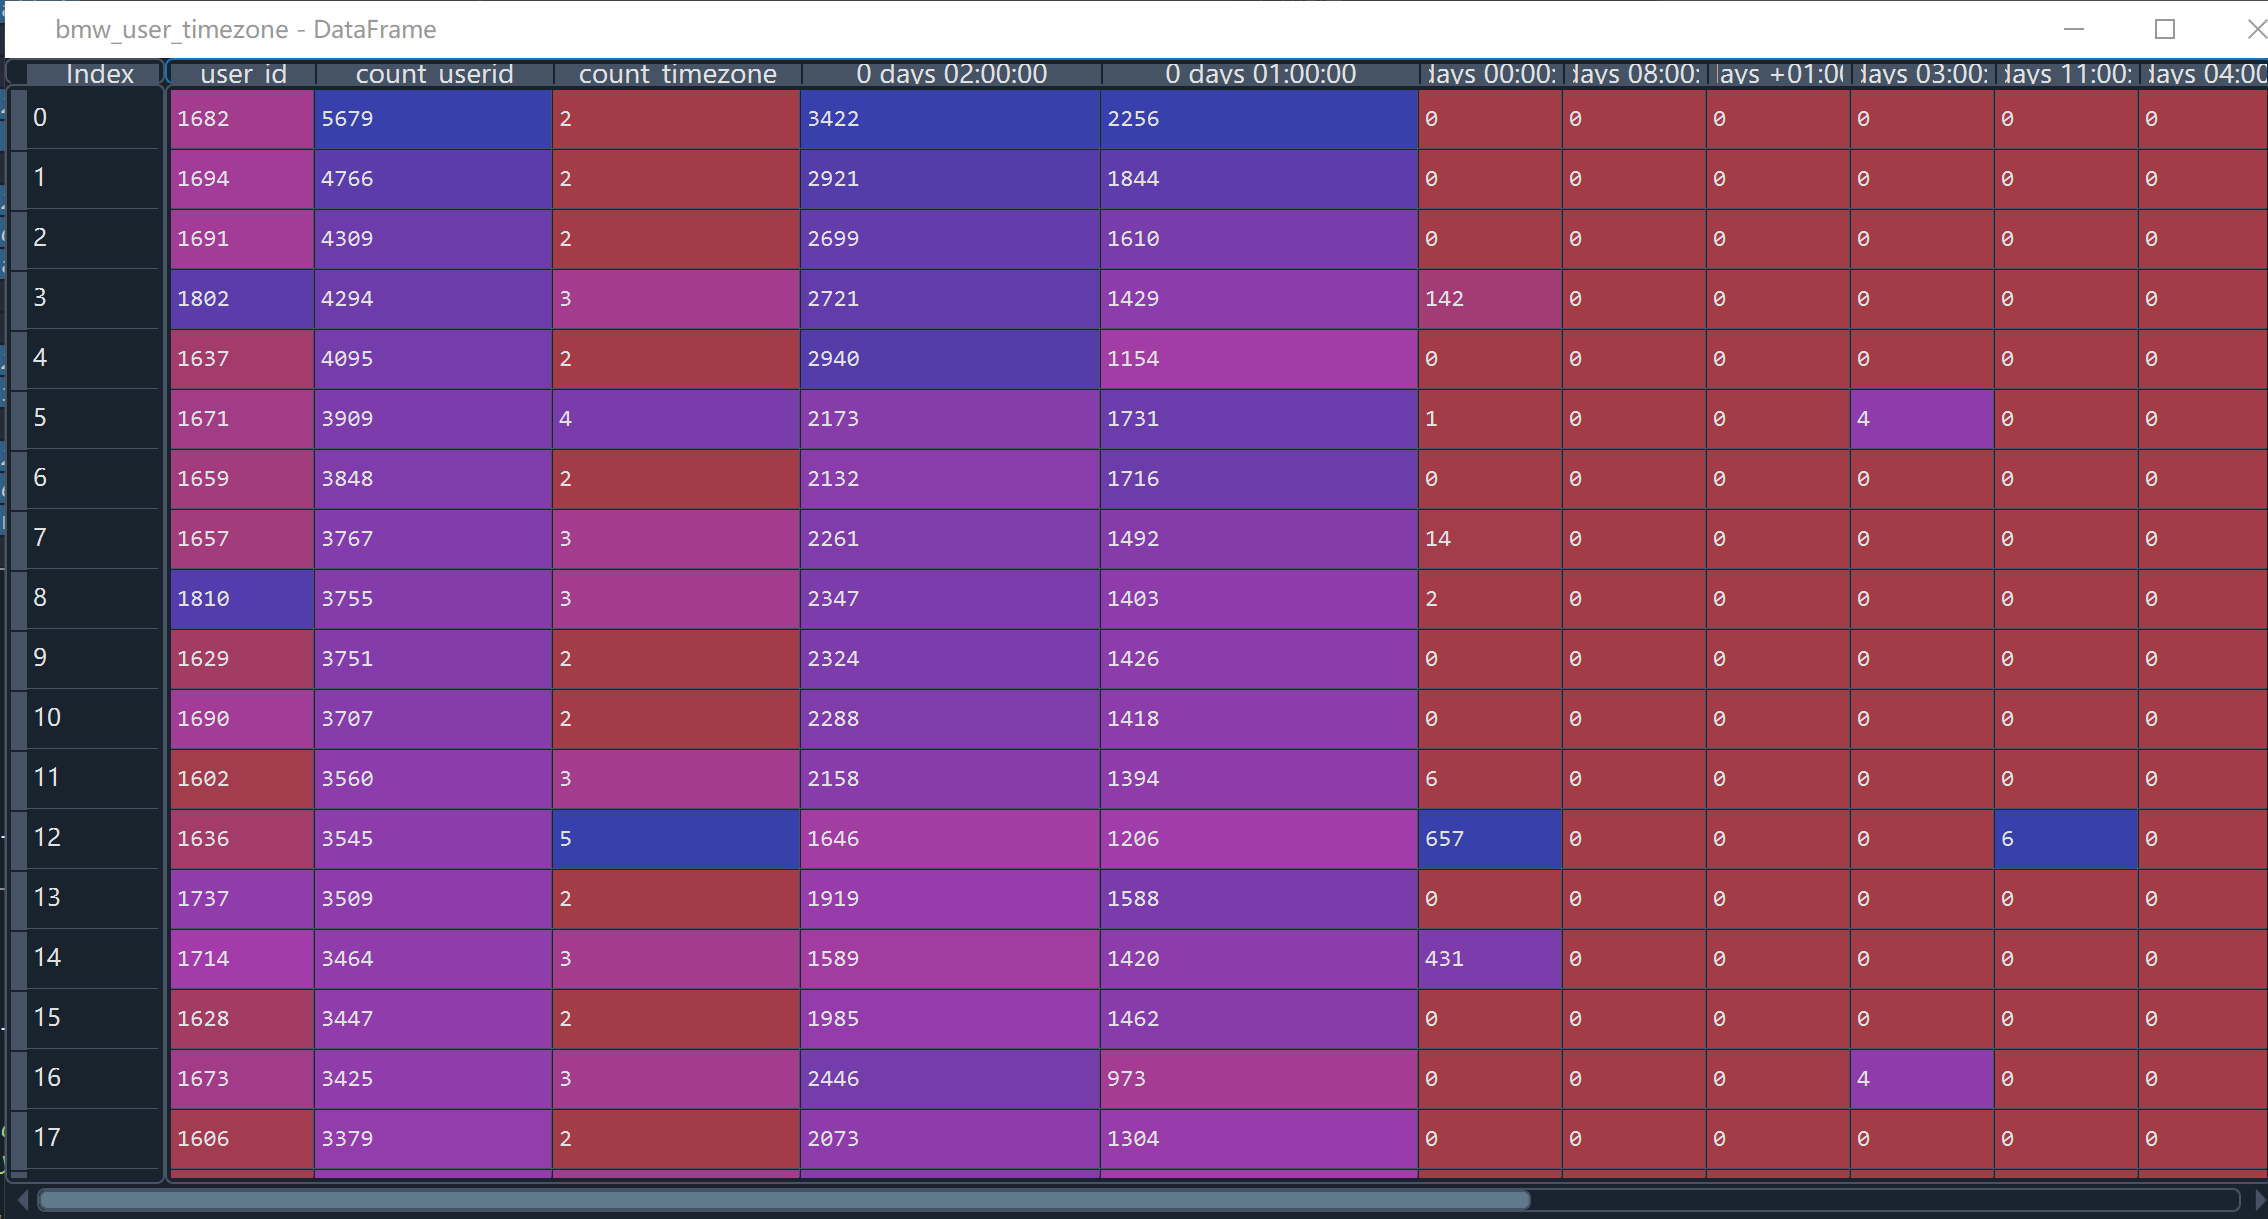

#### *km_stand_start, km_stand_end, soc_customer_start, soc_customer_end*

In [32]:
## km_stand_start, km_stand_end, soc_customer_start, soc_customer_end
bmw_df.loc[:,'km_diff'] = bmw_df.loc[:,'km_stand_end'] - bmw_df.loc[:,'km_stand_start']
bmw_df.loc[:,'soc_diff'] = bmw_df.loc[:,'soc_customer_end'] - bmw_df.loc[:,'soc_customer_start']

In [33]:
bmw_kmdiff_neg = bmw_df.loc[bmw_df['km_diff'] < 0]
print("The numer of negative km_diff values:", len(bmw_kmdiff_neg), "\n")
bmw_kmdiff_zero = bmw_df.loc[bmw_df['km_diff'] == 0]
print("The numer of zero km_diff values:", len(bmw_kmdiff_zero), "\n")
print(bmw_df['km_diff'].describe())

The numer of negative km_diff values: 2 

The numer of zero km_diff values: 182171 

count    346476.000000
mean          4.152657
std          11.443918
min       -1628.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         234.000000
Name: km_diff, dtype: float64


Negative *km_diff* items will be deleted.

In [34]:
print(bmw_df['soc_diff'].describe())

count    346476.000000
mean          0.016884
std          11.288728
min         -98.000000
25%          -1.500000
50%          -0.500000
75%           0.000000
max         100.000000
Name: soc_diff, dtype: float64


### *staypoints* table

#### *purpose*

In [35]:
purpose_det = pnt_df['purpose_detected'].value_counts()
print("Group by purpose_detected:\n",purpose_det,"\n")
purpose_val = pnt_df['purpose_validated'].value_counts()
print("Group by purpose_validated:\n",purpose_val,"\n")
print("Change of purpose:\n",(purpose_val - purpose_det).sort_values(ascending=False),"\n")

Group by purpose_detected:
 unknown    127972
home        68364
work        52898
leisure     28343
wait        26888
errand      21896
study         565
Name: purpose_detected, dtype: int64 

Group by purpose_validated:
 home       71547
leisure    63980
work       62325
unknown    54967
wait       41326
errand     31979
study        802
Name: purpose_validated, dtype: int64 

Change of purpose:
 leisure    35637
wait       14438
errand     10083
work        9427
home        3183
study        237
unknown   -73005
dtype: int64 

